In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
test_hotdog = plt.imread('./hotdog-nothotdog/test/hotdog/1501.jpg');

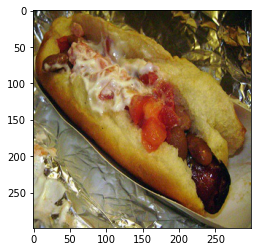

In [9]:
plt.imshow(test_hotdog)

In [10]:
train_gen = ImageDataGenerator(rescale = 1/255.)

test_gen = ImageDataGenerator(rescale = 1/255.)

train_it = train_gen.flow_from_directory('hotdog-nothotdog/train/', class_mode = 'binary', batch_size = 64)

test_it = test_gen.flow_from_directory('hotdog-nothotdog/test/', class_mode = 'binary', batch_size = 64)

Found 3000 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [11]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
history = model.fit(train_it, epochs = 20)

Epoch 1/20
47/47 [==============================] - 34s 706ms/step - loss: 0.7191 - accuracy: 0.6810
Epoch 2/20
47/47 [==============================] - 33s 692ms/step - loss: 0.6719 - accuracy: 0.6840
Epoch 3/20
47/47 [==============================] - 33s 697ms/step - loss: 0.7948 - accuracy: 0.6783
Epoch 4/20
47/47 [==============================] - 33s 696ms/step - loss: 0.6467 - accuracy: 0.6940
Epoch 5/20
47/47 [==============================] - 33s 693ms/step - loss: 0.6542 - accuracy: 0.7073
Epoch 6/20
47/47 [==============================] - 33s 704ms/step - loss: 0.6585 - accuracy: 0.7117
Epoch 7/20
47/47 [==============================] - 34s 722ms/step - loss: 0.6050 - accuracy: 0.7297
Epoch 8/20
47/47 [==============================] - 34s 717ms/step - loss: 0.6033 - accuracy: 0.7190
Epoch 9/20
47/47 [==============================] - 34s 721ms/step - loss: 0.5467 - accuracy: 0.7493
Epoch 10/20
47/47 [==============================] - 33s 699ms/step - loss: 0.5508 - accura

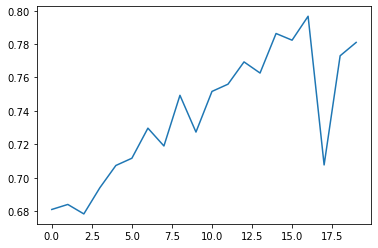

In [15]:
plt.plot(history.history['accuracy'])

In [16]:
loss = model.evaluate(test_it)

11/11 [==============================] - 2s 179ms/step - loss: 1.0817 - accuracy: 0.6599


In [17]:
preds = model.predict(test_it)

In [18]:
preds

array([[9.78906274e-01],
       [5.28924525e-01],
       [9.89428908e-03],
       [9.92958665e-01],
       [1.10360146e-01],
       [5.52934781e-02],
       [9.97430861e-01],
       [9.06079173e-01],
       [9.99941230e-01],
       [5.45383021e-02],
       [3.71222734e-01],
       [2.54750904e-02],
       [8.82480145e-01],
       [9.70124125e-01],
       [9.99929667e-01],
       [5.50955348e-03],
       [5.93534708e-01],
       [5.14128432e-03],
       [7.35616922e-01],
       [6.82440698e-01],
       [9.83314157e-01],
       [1.38113543e-01],
       [9.91036892e-01],
       [9.99934196e-01],
       [9.42981839e-01],
       [5.20814257e-03],
       [3.25367488e-02],
       [4.03357089e-01],
       [2.83587575e-01],
       [9.99862552e-01],
       [9.69423890e-01],
       [1.13990745e-02],
       [4.82028862e-03],
       [3.12141567e-01],
       [2.94333920e-02],
       [7.66194239e-02],
       [9.99993443e-01],
       [1.38214275e-01],
       [1.17664486e-01],
       [3.11576098e-01],


In [185]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets
